In [1]:
# for the sake of expeditious analysis
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from geopandas import GeoDataFrame
import matplotlib.colors as colors
import seaborn as sns
import random as r

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print('File:',os.path.join(dirname, filename))

# settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

# set plot margin limits
#plt.xlim(right=xmax) #xmax is your value
#plt.xlim(left=xmin) #xmin is your value
#plt.ylim(top=ymax) #ymax is your value/
#plt.ylim(bottom=ymin) #ymin is your value
#clear_output()

#clear_output()
print("Data loaded.")

File: /kaggle/input/falcon-space/62023A 10.09.00 PM.TXT
File: /kaggle/input/falcon-space/image0.jpeg
File: /kaggle/input/falcon-space/62023C 10.09.00 PM.TXT
File: /kaggle/input/falcon-space/62023D 10.09.00 PM.TXT
File: /kaggle/input/falcon-space/raw-data-master.csv
File: /kaggle/input/falcon-space/Alzofon test data notes Readme 10.09.00 PM.docx
File: /kaggle/input/falcon-space/62123C.TXT
File: /kaggle/input/falcon-space/62023C.TXT
File: /kaggle/input/falcon-space/62123B.TXT
File: /kaggle/input/falcon-space/62123D.TXT
File: /kaggle/input/falcon-space/62023B 10.09.00 PM.TXT
File: /kaggle/input/falcon-space/62123E.TXT
File: /kaggle/input/falcon-space/Alzofon test data notes Readme.docx
File: /kaggle/input/falcon-space/62023E.TXT
File: /kaggle/input/falcon-space/62023D.TXT
File: /kaggle/input/falcon-space/62023E 10.09.00 PM.TXT
File: /kaggle/input/falcon-space/image3.jpeg
File: /kaggle/input/falcon-space/62023A.TXT
File: /kaggle/input/falcon-space/Master Sheet.xlsx
File: /kaggle/input/falc

In [2]:
# Gauss Range = Tesla/10,000
# 28.025 Ghz 
# Tesla/3 = x Ghz

# Earth's gravity is 1/2*Gauss

# Step reading is important. 

# say 9.88 (frequency mentioned on chart), if you want to figure out where larmore-frquency then divide by 28.025 = 0.3525 = 3,525Guass = .3525Tesla

# if frequency is changed, then expect blips to occur at different positions

# take frequency 

# compare apples to apples between charts using the graphs right-descriptions

# 

In [4]:
df = pd.read_excel('/kaggle/input/falcon-space/Master Sheet.xlsx',header=0,sheet_name='raw data')
df.head()

,62023A,62023B,62023C,62023D,62023E,62023F,Unnamed: 6,62123A,62123B,62123C,62123D,62123E,Unnamed: 12,62223A,Unnamed: 14,62323A,62323B,62323C,Unnamed: 18,63023A,63023B,Unnamed: 21,7623A,0.9847
0,2.6209,2.6241,2.6195,2.6188,2.6113,2.6124,NaN,2.6782,2.7555,2.6731,2.7527,2.7684,NaN,2.6390,NaN,0.9899,0.9936,0.9927,NaN,0.9836,0.9847,NaN,0.9875,0.9847
1,2.6212,2.6241,2.6195,2.6188,2.6113,2.6124,NaN,2.6786,2.7464,2.6644,2.7538,2.7572,NaN,2.6389,NaN,0.9894,0.9936,0.9927,NaN,0.9838,0.9848,NaN,0.9873,0.9847
2,2.6217,2.6241,2.6195,2.6187,2.6115,2.6124,NaN,2.6791,2.7334,2.6483,2.7606,2.7461,NaN,2.6388,NaN,0.9894,0.9936,0.9927,NaN,0.9867,0.9857,NaN,0.9867,0.9846
3,2.6221,2.6241,2.6195,2.6184,2.6132,2.6124,NaN,2.6795,2.7140,2.6471,2.7627,2.7303,NaN,2.6375,NaN,0.9894,0.9936,0.9926,NaN,0.9867,0.9857,NaN,0.9863,0.9845
4,2.6244,2.6242,2.6195,2.6184,2.6132,2.6124,NaN,2.6800,2.6755,2.6459,2.7893,2.6802,NaN,2.6378,NaN,0.9894,0.9937,0.9921,NaN,0.9863,0.9845,NaN,0.9846,0.9845


<Axes: >

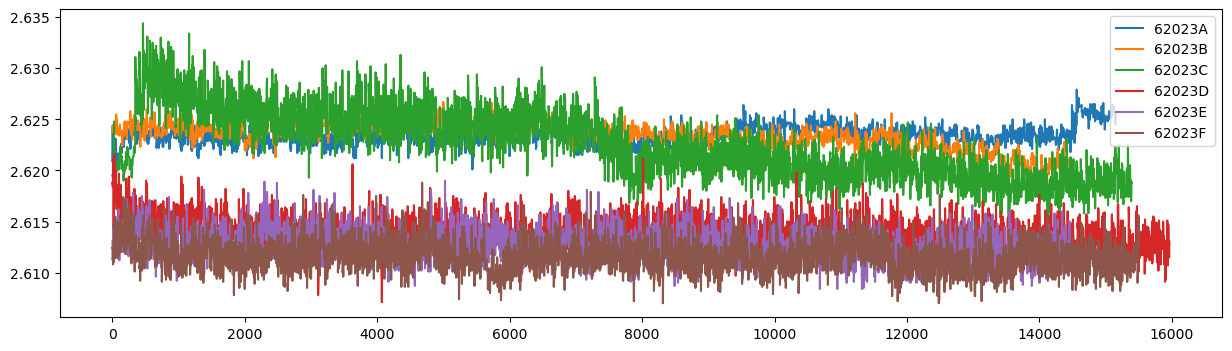

In [5]:
# focals '62023A','62023B','62023C','62023D','62023E','62023F'

df[['62023A','62023B','62023C','62023D','62023E','62023F']].plot(figsize=(15,4))

<Axes: >

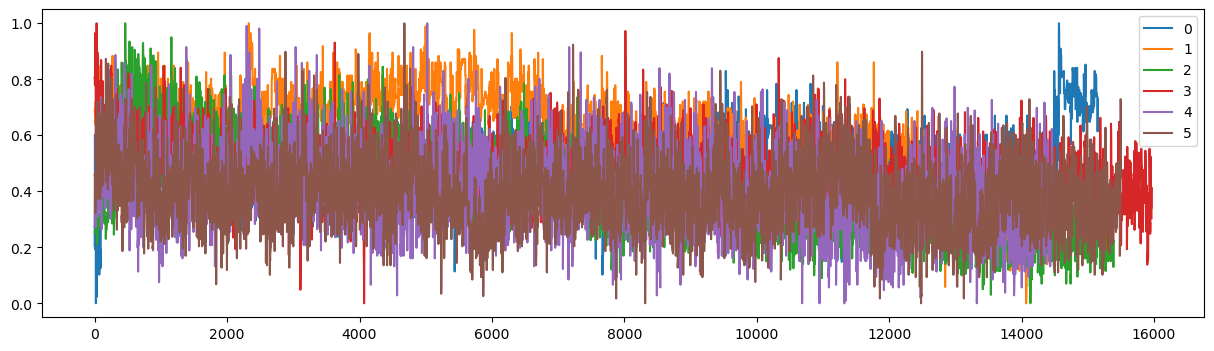

In [7]:
# Master Sheet, normalized 
# focals '62023A','62023B','62023C','62023D','62023E','62023F'
import pandas as pd
from sklearn import preprocessing

x = df[['62023A','62023B','62023C','62023D','62023E','62023F']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)
normalized_df.plot(figsize=(15,4))

In [ ]:
# 

# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023A.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df1 = read_file.T
df1

In [4]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023B.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df2 = read_file.T
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,13950,13951,13952,13953,13954,13955,13956,13957,13958,13959,13960,13961,13962,13963,13964,13965,13966,13967,13968,13969,13970,13971,13972,13973,13974,13975,13976,13977,13978,13979,13980,13981,13982,13983,13984,13985,13986,13987,13988,13989,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999,14000,14001,14002,14003,14004,14005,14006,14007,14008,14009,14010,14011,14012,14013,14014,14015,14016,14017,14018,14019,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029,14030,14031,14032,14033,14034,14035,14036,14037,14038,14039,14040,14041,14042,14043,14044,14045,14046,14047,14048,14049,14050,14051,14052,14053,14054,14055,14056,14057,14058,14059,14060,14061,14062,14063,14064,14065,14066,14067,14068,14069,14070,14071,14072,14073,14074,14075,14076,14077,14078,14079,14080,14081,14082,14083,14084,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094,14095,14096,14097,14098,14099,14100,14101,14102,14103,14104,14105,14106,14107,14108,14109,14110,14111,14112,14113,14114,14115,14116,14117,14118,14119,14120,14121,14122,14123,14124,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134,14135,14136,14137,14138,14139,14140,14141,14142,14143,14144,14145,14146,14147,14148,14149,14150,14151,14152,14153,14154,14155,14156,14157,14158,14159,14160,14161,14162,14163,14164,14165,14166,14167,14168,14169,14170,14171,14172,14173,14174,14175,14176,14177,14178,14179,14180,14181,14182,14183,14184,14185,14186,14187,14188,14189,14190,14191,14192,14193,14194,14195,14196,14197,14198,14199,14200,14201,14202,14203,14204,14205,14206,14207,14208,14209,14210,14211,14212,14213,14214,14215,14216,14217,14218,14219,14220,14221,14222,14223,14224,14225,14226,14227,14228,14229,14230,14231,14232,14233,14234,14235,14236,14237,14238,14239,14240,14241,14242,14243,14244,14245,14246,14247,14248,14249,14250,14251,14252,14253,14254,14255,14256,14257,14258,14259,14260,14261,14262,14263,14264,14265,14266,14267,14268,14269,14270,14271,14272,14273,14274,14275,14276,14277,14278,14279,14280,14281,14282,14283,14284,14285,14286,14287,14288,14289,14290,14291,14292,14293,14294,14295,14296,14297,14298,14299,14300

In [5]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023C.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df3 = read_file.T
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,14894,14895,14896,14897,14898,14899,14900,14901,14902,14903,14904,14905,14906,14907,14908,14909,14910,14911,14912,14913,14914,14915,14916,14917,14918,14919,14920,14921,14922,14923,14924,14925,14926,14927,14928,14929,14930,14931,14932,14933,14934,14935,14936,14937,14938,14939,14940,14941,14942,14943,14944,14945,14946,14947,14948,14949,14950,14951,14952,14953,14954,14955,14956,14957,14958,14959,14960,14961,14962,14963,14964,14965,14966,14967,14968,14969,14970,14971,14972,14973,14974,14975,14976,14977,14978,14979,14980,14981,14982,14983,14984,14985,14986,14987,14988,14989,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999,15000,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,15011,15012,15013,15014,15015,15016,15017,15018,15019,15020,15021,15022,15023,15024,15025,15026,15027,15028,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038,15039,15040,15041,15042,15043,15044,15045,15046,15047,15048,15049,15050,15051,15052,15053,15054,15055,15056,15057,15058,15059,15060,15061,15062,15063,15064,15065,15066,15067,15068,15069,15070,15071,15072,15073,15074,15075,15076,15077,15078,15079,15080,15081,15082,15083,15084,15085,15086,15087,15088,15089,15090,15091,15092,15093,15094,15095,15096,15097,15098,15099,15100,15101,15102,15103,15104,15105,15106,15107,15108,15109,15110,15111,15112,15113,15114,15115,15116,15117,15118,15119,15120,15121,15122,15123,15124,15125,15126,15127,15128,15129,15130,15131,15132,15133,15134,15135,15136,15137,15138,15139,15140,15141,15142,15143,15144,15145,15146,15147,15148,15149,15150,15151,15152,15153,15154,15155,15156,15157,15158,15159,15160,15161,15162,15163,15164,15165,15166,15167,15168,15169,15170,15171,15172,15173,15174,15175,15176,15177,15178,15179,15180,15181,15182,15183,15184,15185,15186,15187,15188,15189,15190,15191,15192,15193,15194,15195,15196,15197,15198,15199,15200,15201,15202,15203,15204,15205,15206,15207,15208,15209,15210,15211,15212,15213,15214,15215,15216,15217,15218,15219,15220,15221,15222,15223,15224,15225,15226,15227,15228,15229,15230,15231,15232,15233,15234,15235,15236,15237,15238,15239,15240,15241,15242,15243,15244

In [6]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023D.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df4 = read_file.T
df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,15463,15464,15465,15466,15467,15468,15469,15470,15471,15472,15473,15474,15475,15476,15477,15478,15479,15480,15481,15482,15483,15484,15485,15486,15487,15488,15489,15490,15491,15492,15493,15494,15495,15496,15497,15498,15499,15500,15501,15502,15503,15504,15505,15506,15507,15508,15509,15510,15511,15512,15513,15514,15515,15516,15517,15518,15519,15520,15521,15522,15523,15524,15525,15526,15527,15528,15529,15530,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15545,15546,15547,15548,15549,15550,15551,15552,15553,15554,15555,15556,15557,15558,15559,15560,15561,15562,15563,15564,15565,15566,15567,15568,15569,15570,15571,15572,15573,15574,15575,15576,15577,15578,15579,15580,15581,15582,15583,15584,15585,15586,15587,15588,15589,15590,15591,15592,15593,15594,15595,15596,15597,15598,15599,15600,15601,15602,15603,15604,15605,15606,15607,15608,15609,15610,15611,15612,15613,15614,15615,15616,15617,15618,15619,15620,15621,15622,15623,15624,15625,15626,15627,15628,15629,15630,15631,15632,15633,15634,15635,15636,15637,15638,15639,15640,15641,15642,15643,15644,15645,15646,15647,15648,15649,15650,15651,15652,15653,15654,15655,15656,15657,15658,15659,15660,15661,15662,15663,15664,15665,15666,15667,15668,15669,15670,15671,15672,15673,15674,15675,15676,15677,15678,15679,15680,15681,15682,15683,15684,15685,15686,15687,15688,15689,15690,15691,15692,15693,15694,15695,15696,15697,15698,15699,15700,15701,15702,15703,15704,15705,15706,15707,15708,15709,15710,15711,15712,15713,15714,15715,15716,15717,15718,15719,15720,15721,15722,15723,15724,15725,15726,15727,15728,15729,15730,15731,15732,15733,15734,15735,15736,15737,15738,15739,15740,15741,15742,15743,15744,15745,15746,15747,15748,15749,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763,15764,15765,15766,15767,15768,15769,15770,15771,15772,15773,15774,15775,15776,15777,15778,15779,15780,15781,15782,15783,15784,15785,15786,15787,15788,15789,15790,15791,15792,15793,15794,15795,15796,15797,15798,15799,15800,15801,15802,15803,15804,15805,15806,15807,15808,15809,15810,15811,15812,15813

In [7]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023E.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df5 = read_file.T
df5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,13964,13965,13966,13967,13968,13969,13970,13971,13972,13973,13974,13975,13976,13977,13978,13979,13980,13981,13982,13983,13984,13985,13986,13987,13988,13989,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999,14000,14001,14002,14003,14004,14005,14006,14007,14008,14009,14010,14011,14012,14013,14014,14015,14016,14017,14018,14019,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029,14030,14031,14032,14033,14034,14035,14036,14037,14038,14039,14040,14041,14042,14043,14044,14045,14046,14047,14048,14049,14050,14051,14052,14053,14054,14055,14056,14057,14058,14059,14060,14061,14062,14063,14064,14065,14066,14067,14068,14069,14070,14071,14072,14073,14074,14075,14076,14077,14078,14079,14080,14081,14082,14083,14084,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094,14095,14096,14097,14098,14099,14100,14101,14102,14103,14104,14105,14106,14107,14108,14109,14110,14111,14112,14113,14114,14115,14116,14117,14118,14119,14120,14121,14122,14123,14124,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134,14135,14136,14137,14138,14139,14140,14141,14142,14143,14144,14145,14146,14147,14148,14149,14150,14151,14152,14153,14154,14155,14156,14157,14158,14159,14160,14161,14162,14163,14164,14165,14166,14167,14168,14169,14170,14171,14172,14173,14174,14175,14176,14177,14178,14179,14180,14181,14182,14183,14184,14185,14186,14187,14188,14189,14190,14191,14192,14193,14194,14195,14196,14197,14198,14199,14200,14201,14202,14203,14204,14205,14206,14207,14208,14209,14210,14211,14212,14213,14214,14215,14216,14217,14218,14219,14220,14221,14222,14223,14224,14225,14226,14227,14228,14229,14230,14231,14232,14233,14234,14235,14236,14237,14238,14239,14240,14241,14242,14243,14244,14245,14246,14247,14248,14249,14250,14251,14252,14253,14254,14255,14256,14257,14258,14259,14260,14261,14262,14263,14264,14265,14266,14267,14268,14269,14270,14271,14272,14273,14274,14275,14276,14277,14278,14279,14280,14281,14282,14283,14284,14285,14286,14287,14288,14289,14290,14291,14292,14293,14294,14295,14296,14297,14298,14299,14300,14301,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311,14312,14313,14314

In [8]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023F.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df6 = read_file.T
df6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,15003,15004,15005,15006,15007,15008,15009,15010,15011,15012,15013,15014,15015,15016,15017,15018,15019,15020,15021,15022,15023,15024,15025,15026,15027,15028,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038,15039,15040,15041,15042,15043,15044,15045,15046,15047,15048,15049,15050,15051,15052,15053,15054,15055,15056,15057,15058,15059,15060,15061,15062,15063,15064,15065,15066,15067,15068,15069,15070,15071,15072,15073,15074,15075,15076,15077,15078,15079,15080,15081,15082,15083,15084,15085,15086,15087,15088,15089,15090,15091,15092,15093,15094,15095,15096,15097,15098,15099,15100,15101,15102,15103,15104,15105,15106,15107,15108,15109,15110,15111,15112,15113,15114,15115,15116,15117,15118,15119,15120,15121,15122,15123,15124,15125,15126,15127,15128,15129,15130,15131,15132,15133,15134,15135,15136,15137,15138,15139,15140,15141,15142,15143,15144,15145,15146,15147,15148,15149,15150,15151,15152,15153,15154,15155,15156,15157,15158,15159,15160,15161,15162,15163,15164,15165,15166,15167,15168,15169,15170,15171,15172,15173,15174,15175,15176,15177,15178,15179,15180,15181,15182,15183,15184,15185,15186,15187,15188,15189,15190,15191,15192,15193,15194,15195,15196,15197,15198,15199,15200,15201,15202,15203,15204,15205,15206,15207,15208,15209,15210,15211,15212,15213,15214,15215,15216,15217,15218,15219,15220,15221,15222,15223,15224,15225,15226,15227,15228,15229,15230,15231,15232,15233,15234,15235,15236,15237,15238,15239,15240,15241,15242,15243,15244,15245,15246,15247,15248,15249,15250,15251,15252,15253,15254,15255,15256,15257,15258,15259,15260,15261,15262,15263,15264,15265,15266,15267,15268,15269,15270,15271,15272,15273,15274,15275,15276,15277,15278,15279,15280,15281,15282,15283,15284,15285,15286,15287,15288,15289,15290,15291,15292,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302,15303,15304,15305,15306,15307,15308,15309,15310,15311,15312,15313,15314,15315,15316,15317,15318,15319,15320,15321,15322,15323,15324,15325,15326,15327,15328,15329,15330,15331,15332,15333,15334,15335,15336,15337,15338,15339,15340,15341,15342,15343,15344,15345,15346,15347,15348,15349,15350,15351,15352,15353

## Mark's Excel Outputs

In [4]:
df = pd.read_csv('/kaggle/input/falcon-space/raw-data-master.csv',header=0)

# 62023A	62023B	62023C	62023D	62023E	62023F 62123A	62123B	62123C	62123D	62123E	62223A ~ 2.somethings
# 62323A	62323B	62323C ~ 0.99somethings
df

,62023A,62023B,62023C,62023D,62023E,62023F,62123A,62123B,62123C,62123D,62123E,62223A,62323A,62323B,62323C
0,2.6209,2.6241,2.6195,2.6188,2.6113,2.6124,2.6782,2.7555,2.6731,2.7527,2.7684,2.6390,0.9899,0.9936,0.9927
1,2.6212,2.6241,2.6195,2.6188,2.6113,2.6124,2.6786,2.7464,2.6644,2.7538,2.7572,2.6389,0.9894,0.9936,0.9927
2,2.6217,2.6241,2.6195,2.6187,2.6115,2.6124,2.6791,2.7334,2.6483,2.7606,2.7461,2.6388,0.9894,0.9936,0.9927
3,2.6221,2.6241,2.6195,2.6184,2.6132,2.6124,2.6795,2.7140,2.6471,2.7627,2.7303,2.6375,0.9894,0.9936,0.9926
4,2.6244,2.6242,2.6195,2.6184,2.6132,2.6124,2.6800,2.6755,2.6459,2.7893,2.6802,2.6378,0.9894,0.9937,0.9921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15958,NaN,NaN,NaN,2.6121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15959,NaN,NaN,NaN,2.6122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15960,NaN,NaN,NaN,2.6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15961,NaN,NaN,NaN,2.6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

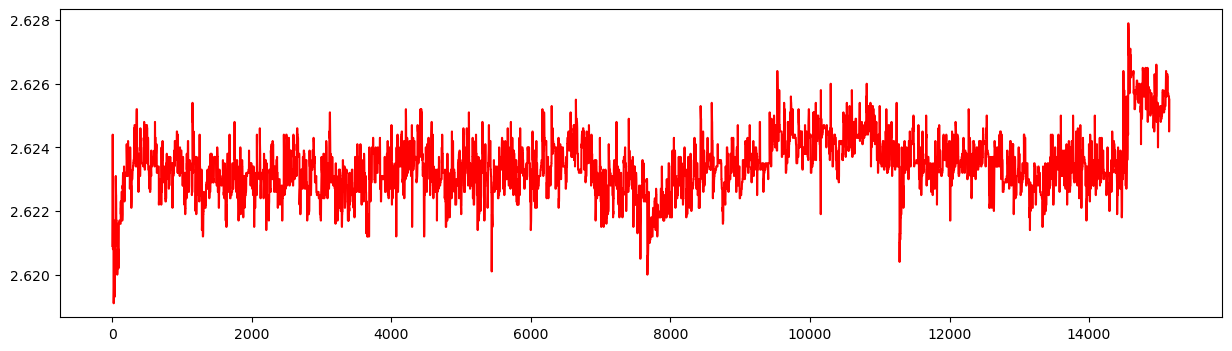

In [15]:
df['62023A'].plot(color='r',figsize=(15,4))

<Axes: >

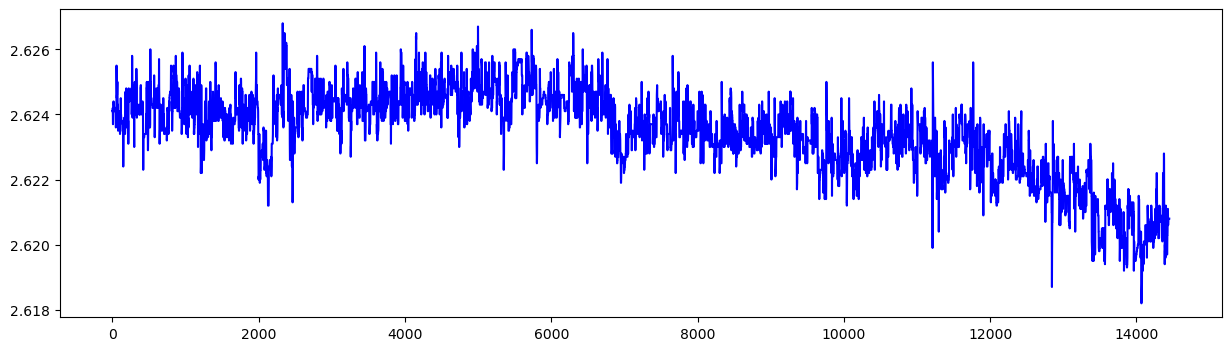

In [16]:
df['62023B'].plot(color='b',figsize=(15,4))

<Axes: >

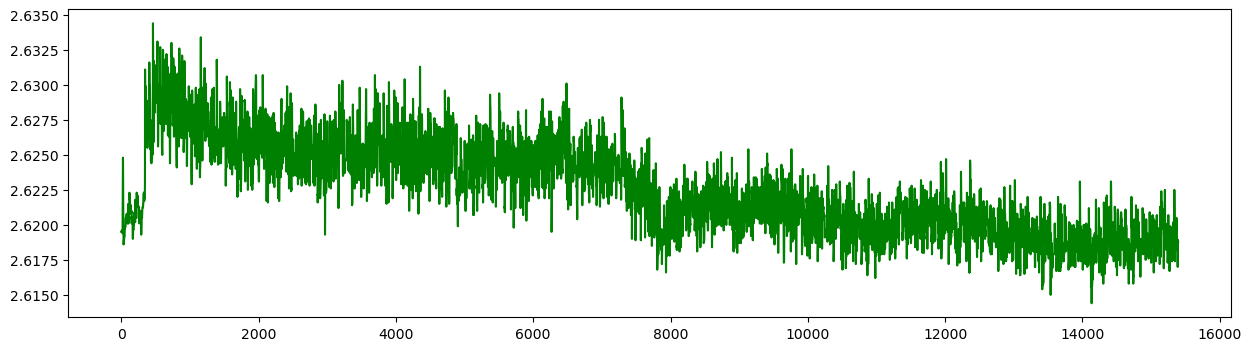

In [18]:
df['62023C'].plot(color='g',figsize=(15,4))

<Axes: >

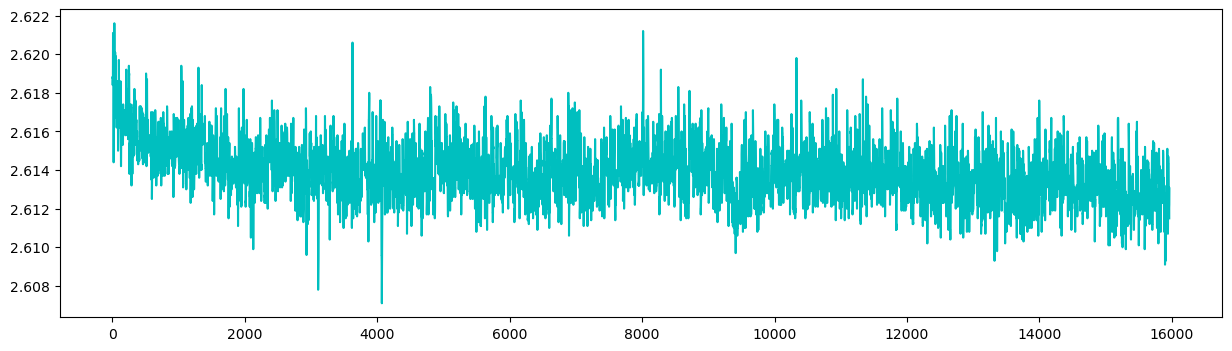

In [19]:
df['62023D'].plot(color='c',figsize=(15,4))

<Axes: >

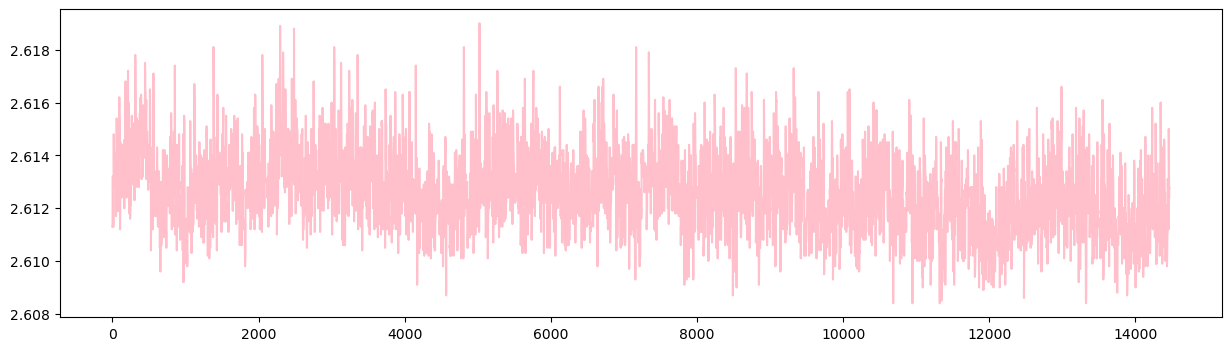

In [22]:
df['62023E'].plot(color='pink',figsize=(15,4))

<Axes: >

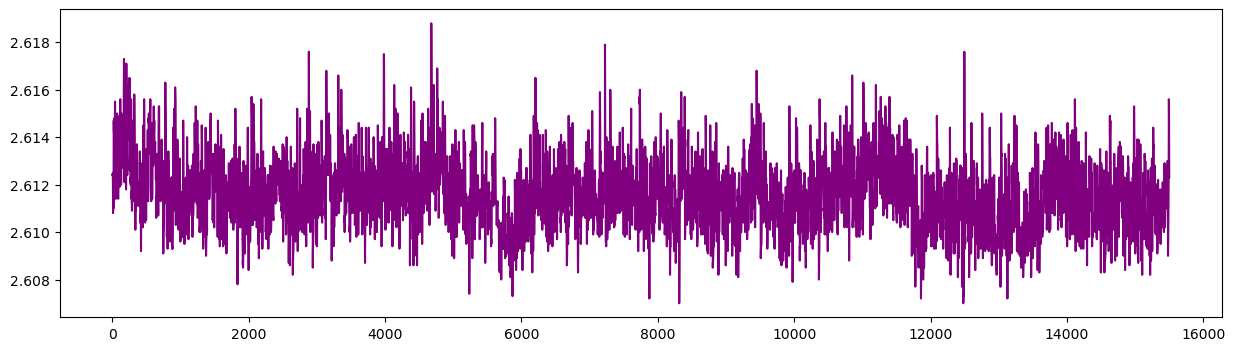

In [23]:
df['62023F'].plot(color='purple',figsize=(15,4))

In [6]:
import pandas as pd
from sklearn import preprocessing

df1 = df[['62023A','62023B','62023C','62023D','62023E','62023F','62123A','62123B','62123C','62123D','62123E','62223A']]
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.204545,0.686047,0.255,0.806897,0.273585,0.457627,0.342190,0.956298,0.272802,0.705551,0.909609,0.602410
1,0.238636,0.686047,0.255,0.806897,0.273585,0.457627,0.345411,0.878320,0.201315,0.714401,0.829893,0.590361
2,0.295455,0.686047,0.255,0.800000,0.292453,0.457627,0.349436,0.766924,0.069022,0.769107,0.750890,0.578313
3,0.340909,0.686047,0.255,0.779310,0.452830,0.457627,0.352657,0.600686,0.059162,0.786002,0.638434,0.421687
4,0.602273,0.697674,0.255,0.779310,0.452830,0.457627,0.356683,0.270780,0.049302,1.000000,0.281851,0.457831
...,...,...,...,...,...,...,...,...,...,...,...,...
15958,NaN,NaN,NaN,0.344828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15959,NaN,NaN,NaN,0.351724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15960,NaN,NaN,NaN,0.413793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15961,NaN,NaN,NaN,0.413793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

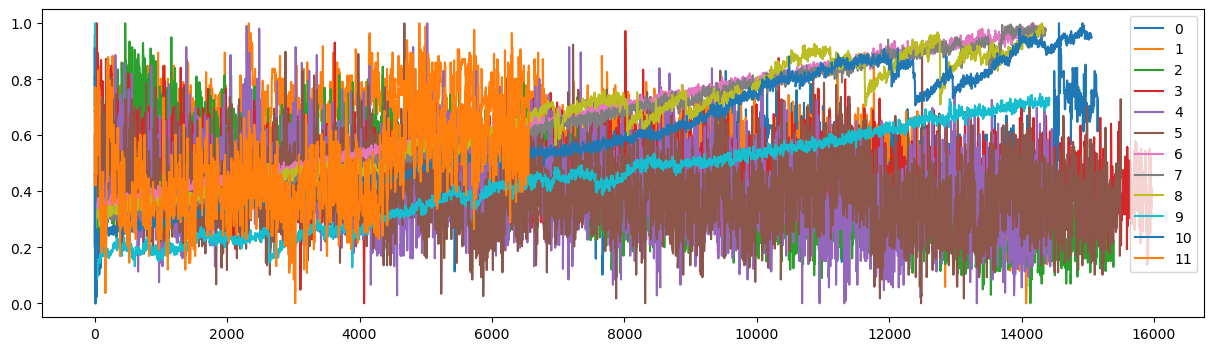

In [14]:
normalized_df.plot(figsize=(15,4))

In [9]:
# '62323A','62323B','62323C'
df2 = df[['62323A','62323B','62323C']]
x = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df2= pd.DataFrame(x_scaled)
normalized_df2

,0,1,2
0,0.454545,0.666667,0.813953
1,0.413223,0.666667,0.813953
2,0.413223,0.666667,0.813953
3,0.413223,0.666667,0.802326
4,0.413223,0.677778,0.744186
...,...,...,...
15958,NaN,NaN,NaN
15959,NaN,NaN,NaN
15960,NaN,NaN,NaN
15961,NaN,NaN,NaN


<Axes: >

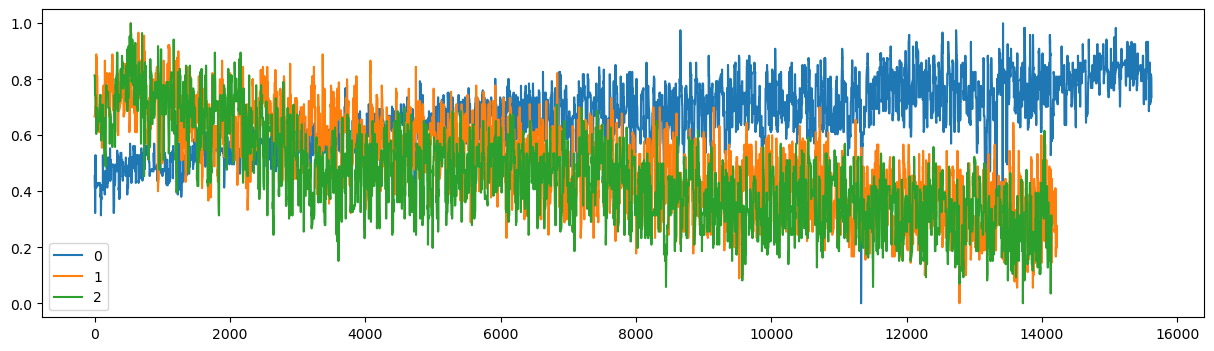

In [13]:
# normalized
normalized_df2.plot(figsize=(15,4))